In [1]:
#Package Definitions 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn-whitegrid')                  
%matplotlib inline
sns.set(style='whitegrid', font_scale=1.3, color_codes=True, rc={'figure.figsize':(15,8)})  # To apply seaborn whitegrid style to the plots.
warnings.filterwarnings("ignore")    # Ignore warnings
print("Packages Initiated")

Packages Initiated


In [3]:
!pip install pandas-profiling --upgrade
print("panda profile Initiated")

     |████████████████████████████████| 266kB 960kB/s eta 0:00:01
     |████████████████████████████████| 6.5MB 17kB/s  eta 0:00:01     |█████████▉                      | 2.0MB 527kB/s eta 0:00:09     |██████████████▋                 | 3.0MB 288kB/s eta 0:00:13     |█████████████████▍              | 3.6MB 803kB/s eta 0:00:04
     |████████████████████████████████| 133kB 5.9MB/s eta 0:00:01
     |████████████████████████████████| 604kB 4.5MB/s eta 0:00:01
     |████████████████████████████████| 71kB 522kB/s  eta 0:00:01
     |████████████████████████████████| 11.5MB 18kB/s eta 0:00:011    |████▋                           | 1.7MB 4.7MB/s eta 0:00:03     |████████▍                       | 3.0MB 937kB/s eta 0:00:10     |███████████▋                    | 4.2MB 743kB/s eta 0:00:10
     |████████████████████████████████| 71kB 527kB/s eta 0:00:011
     |████████████████████████████████| 3.1MB 174kB/s eta 0:00:01     |███████████▍                    | 1.1MB 6.0MB/s eta 0:00:01     |████████████

  Using cached https://files.pythonhosted.org/packages/a2/db/4313ab3be961f7a763066401fb77f7748373b6094076ae2bda2806988af6/attrs-19.3.0-py2.py3-none-any.whl
     |████████████████████████████████| 1.6MB 2.4MB/s eta 0:00:01
     |████████████████████████████████| 296kB 5.9MB/s eta 0:00:01B 5.9MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27185 sha256=784d61b8890db489d355310b6cb1811a385215351320614775f90c45dd3e728e
  Stored in directory: /home/nbuser/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459


  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=293994 sha256=2917dd9429de79dc76344808ff8bd92a0605e1646c1d4cff300fbee86d7578d1
  Stored in directory: /home/nbuser/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
ERROR: okpy 1.13.11 has requirement requests==2.12.4, but you'll have requests 2.24.0 which is incompatible.
ERROR: azureml-train-automl 1.0.72 has requirement onnxmltools==1.4.1, but you'll have onnxmltools 1.6.0 which is incompatible.
ERROR: azureml-train-automl 1.0.72 has requirement pandas<=0.23.4,>=0.21.0, but you'll have pandas 1.1.0 which is incompatible.
ERROR: azureml-train-automl 1.0.72 has requirement scipy<=1.1.0,>=1.0.0, but you'll have scipy 1.5.2 which is incompatible.
ERROR: azureml-opendatasets 1.0.72.1 has requirement pandas<=0.23.4,>=0.21.0, but you'll have pandas 1.1.0 which is incompatible.
ERROR: azureml-opendatasets 1.0.72.1 has requirement scipy<=1.1.0,>=1

In [1]:
from pandas_profiling import ProfileReport
print(type(ProfileReport))
#import pandas_profiling

Matplotlib is building the font cache; this may take a moment.


<class 'type'>


In [2]:
print(id(ProfileReport))

93866931486680


In [2]:
# Load HR employee data
df_hrAttrition= pd.read_csv('HR-Analytics_HR-Employee-Attrition.csv')
df_hrAttrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
#To Find rows/columns
df_hrAttrition.shape
#Check datatypes
df_hrAttrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
Age                        1470 non-null int64
Attrition                  1470 non-null int64
BusinessTravel             1470 non-null int64
Department                 1470 non-null int64
DistanceFromHome           1470 non-null int64
EducationField             1470 non-null int64
EnvironmentSatisfaction    1470 non-null int64
Gender                     1470 non-null int64
HourlyRate                 1470 non-null int64
JobInvolvement             1470 non-null int64
JobLevel                   1470 non-null int64
JobRole                    1470 non-null int64
JobSatisfaction            1470 non-null int64
MaritalStatus              1470 non-null int64
MonthlyIncome              1470 non-null int64
MonthlyRate                1470 non-null int64
NumCompaniesWorked         1470 non-null int64
OverTime                   1470 non-null int64
PercentSalaryHike          1470 non-null int64


In [4]:
#Get statastical details
df_hrAttrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
#Check if any Nulls in data
pd.isnull(df_hrAttrition).sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# ************ Data Cleansing ************ 
# Iterate through columns and find columns not needed for analysis as  null values check done
NoofColumns=len(df_hrAttrition.columns)
for i in range(NoofColumns):
    print (df_hrAttrition.columns.values[i],":",np.unique(df_hrAttrition[df_hrAttrition.columns.values[i]]),"\n")

Age : [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60] 

Attrition : ['No' 'Yes'] 

BusinessTravel : ['Non-Travel' 'Travel_Frequently' 'Travel_Rarely'] 

DailyRate : [ 102  103  104  105  106  107  109  111  115  116  117  118  119  120
  121  124  125  128  129  130  131  132  134  135  136  138  140  141
  142  143  144  145  146  147  148  150  152  153  154  155  156  157
  160  161  163  164  167  168  170  172  174  176  177  179  180  181
  182  185  188  189  192  193  194  195  196  199  200  201  202  203
  204  205  206  207  208  210  211  213  216  217  218  219  224  228
  230  231  232  234  237  238  240  241  243  244  247  248  249  251
  252  253  254  256  258  261  263  264  265  266  267  268  269  271
  277  279  280  282  285  286  287  288  289  290  294  296  299  300
  301  302  303  304  305  306  307  309  310  311  313  314  316  317
  318  319  322  325  326  328  329  330 

In [7]:
#'StandardHours','EmployeeCount','Over18' columns xhas single value and has no part in analysis. Hence delete
df_hrAttrition = df_hrAttrition.drop(['StandardHours','EmployeeCount','Over18'],axis=1)

In [8]:
# Daily Rate aso independent of Attrition -- so drop column
df_hrAttrition = df_hrAttrition.drop("DailyRate",axis=1)

In [9]:
# Emp number not needed as individual emp level analysis not done. Hence drop so drop column
df_hrAttrition = df_hrAttrition.drop("EmployeeNumber",axis=1) 

In [10]:
# Now will hv 30 columns
df_hrAttrition.shape

(1470, 30)

In [11]:
#As attrition is important and dependent field hence making it as numerical to help get plots
df_hrAttrition = df_hrAttrition.replace({'Attrition':{'No':0,'Yes':1}})

In [12]:
df_hrAttrition.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [13]:
df_hrAttrition[df_hrAttrition["Attrition"]==1]["Attrition"].value_counts() # Finding attrition data 
#df_hrAttrition[df_hrAttrition["Attrition"]==1]["MaritalStatus"].value_counts()

1    237
Name: Attrition, dtype: int64

In [14]:
#Get correlation
df_hrAttrition.nunique()
df_hrAttrition.corr()
#df_hrAttrition.groupby("Attrition").corr()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DistanceFromHome,-0.001686,0.077924,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,-0.159840,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


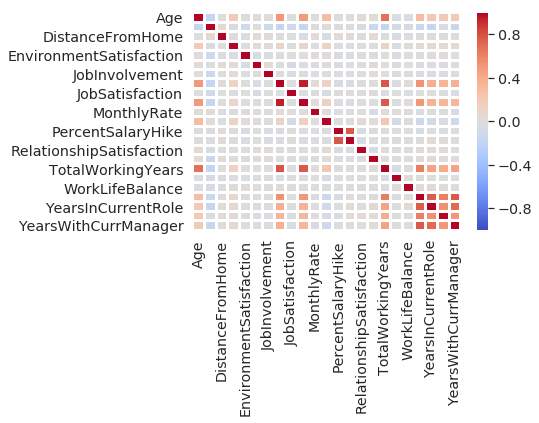

In [15]:
#Heatmap 
sns.heatmap(df_hrAttrition.corr() , vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=2,fmt='.1g')
#sns.heatmap(df_hrAttrition[df_hrAttrition["Attrition"]==1].corr() , vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=2,fmt='.1g')

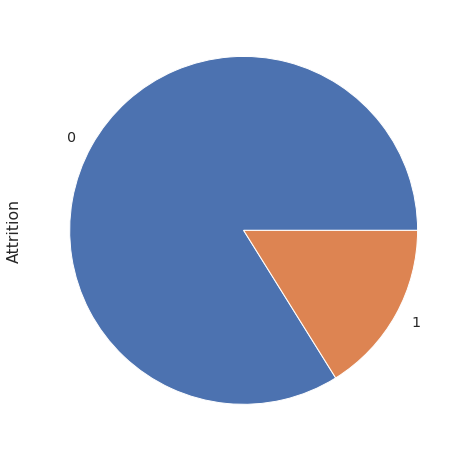

In [17]:
#df_hrAttrition.nunique()
df_hrAttrition.Attrition.value_counts().plot(kind="pie",label="Attrition")

In [16]:
## Group all Numerical Descrete, Numerical continuous and Categrical variables  into separate Lists to Iterate and analyze.
#resultdtype = df_hrAttrition.dtypes
#print(resultdtype)

discnum_col = [] ## Numerical descrete variables
discnumcont_col = [] ## continuous variables
disccateg_col = [] ## categorical 
for column in df_hrAttrition.columns:
    if df_hrAttrition[column].dtypes != object and df_hrAttrition[column].nunique() < 30:
        #print(f"{column} : {df_hrAttrition[column].unique()}")
        discnum_col.append(column)
        #print("====================================")
    elif df_hrAttrition[column].dtypes != object and df_hrAttrition[column].nunique() >= 30:
        discnumcont_col.append(column)
    elif df_hrAttrition[column].dtypes == object:
        disccateg_col.append(column)
discnum_col.remove('Attrition')
print("discnum_col=",discnum_col)
print("discnumcont_col=",discnumcont_col)
print("disccateg_col=",disccateg_col)

discnum_col= ['DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
discnumcont_col= ['Age', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany']
disccateg_col= ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [18]:
''' 
def VisualizationAxis(disc_col,df_hrAttrition,i,x,y,row,col):
    if disc_col.count(df_hrAttrition.columns.values[i]) > 0 :  #if column  in data frame is numerical       
        if(i!=1):
            sns.distplot(df_hrAttrition[df_hrAttrition.columns.values[i]], ax = ax[x,y],kde=True, rug=False)  # Plot on 1st axes 
           # print("loop"+str(df_hrAttrition.columns.values[i]))
            sns.boxplot(df_hrAttrition['Attrition'],df_hrAttrition[df_hrAttrition.columns.values[i]], ax = ax[x+1,y])  # Plot on 1st axes 
        # graphMovment(x,y,row,col)
        y=y+1
        if(x<row-2 and y==col):
            x=x+2
            y=0
        if(x==row-2 and y==col):
            break        
    else:
        continue
'''

SyntaxError: 'break' outside loop (cell_name, line 16)

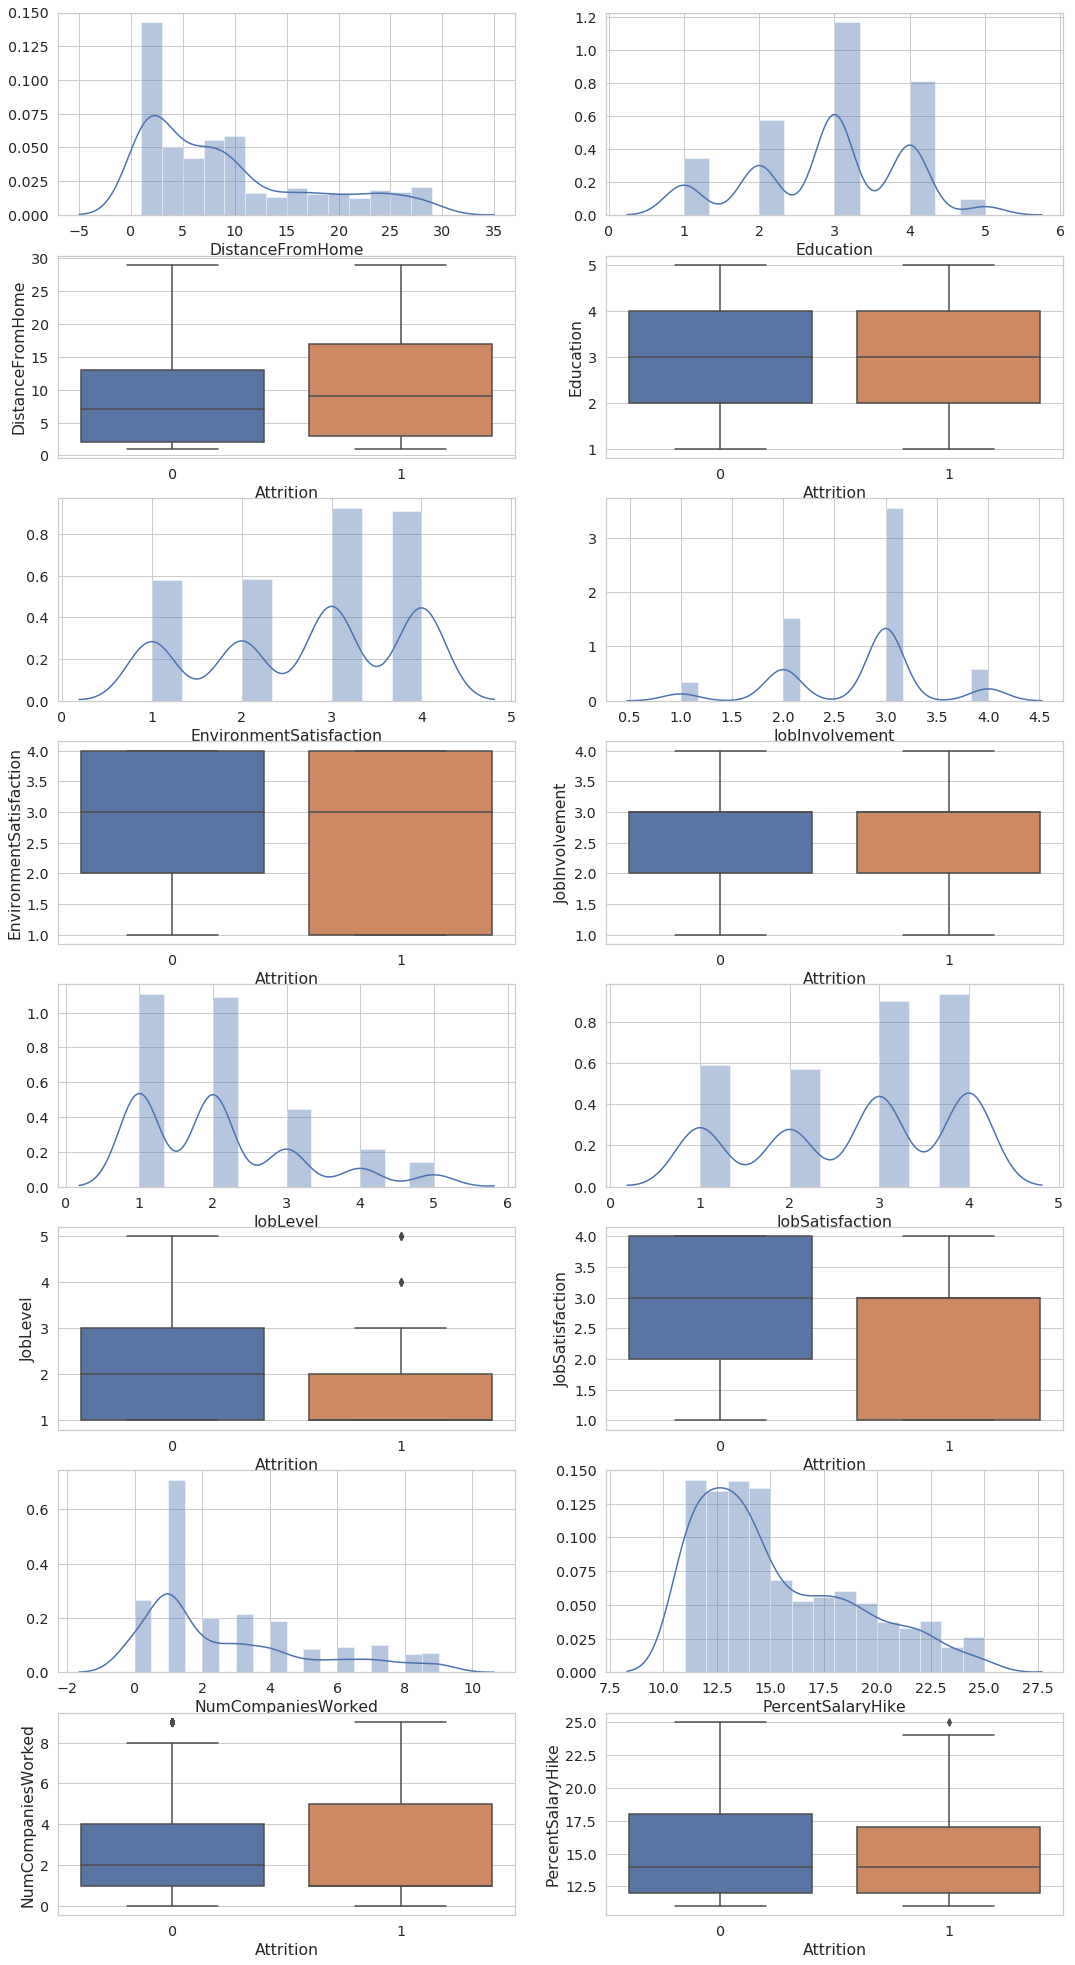

In [18]:
# plot bar chart and boxplot for all numerical values as part of Uni and Bivariant analysis respectively
row=8
col=2
fig,ax = plt.subplots(row,col, figsize=(18,35))  # 'ax'Reference for four axes
x=0
y=0
for i in range(df_hrAttrition.shape[1]):
    # Check if Numerical column then plot bar and box plot
    if discnum_col.count(df_hrAttrition.columns.values[i]) > 0 :  #if column  in data frame is numerical       
        if(i!=1):
            sns.distplot(df_hrAttrition[df_hrAttrition.columns.values[i]], ax = ax[x,y],kde=True, rug=False)  # Plot on 1st axes 
           # print("loop"+str(df_hrAttrition.columns.values[i]))
            sns.boxplot(df_hrAttrition['Attrition'],df_hrAttrition[df_hrAttrition.columns.values[i]], ax = ax[x+1,y])  # Plot on 1st axes 
        # graphMovment(x,y,row,col)
        y=y+1
        if(x<row-2 and y==col):
            x=x+2
            y=0
        if(x==row-2 and y==col):
            break        
    else:
        continue
plt.show()

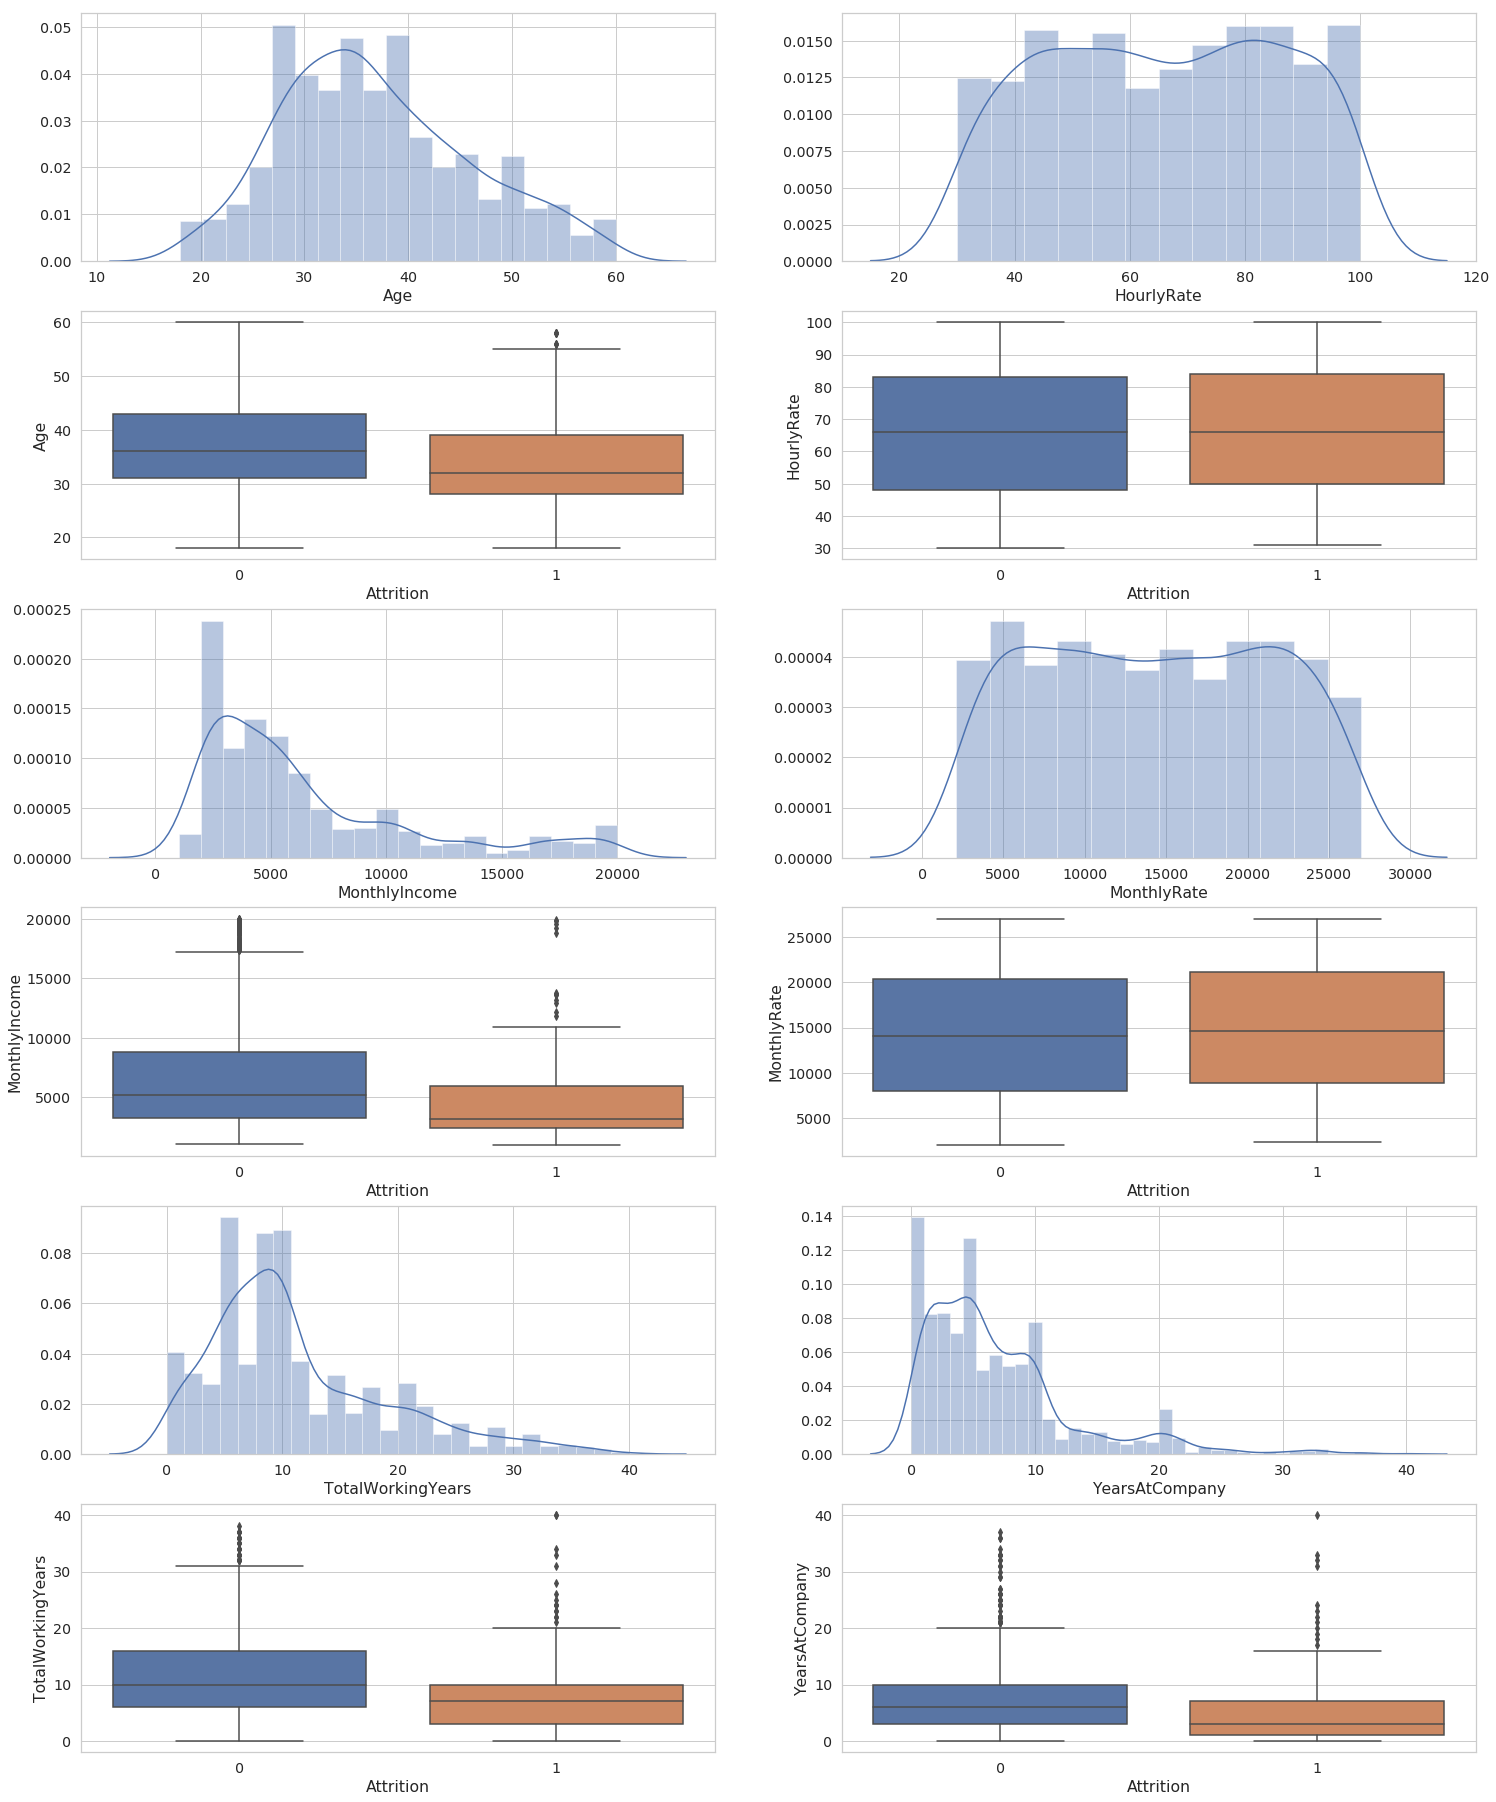

In [19]:
# plot boxplot and bar chart for all numerical CONTINUOUS values as part of bivariant analysis-- Age is 
row=6
col=2
fig,ax = plt.subplots(row,col, figsize=(25,32))  # 'ax' has references to all the four axes
x=0
y=0
# Check if Numerical column then plot bar and box plot
for i in range(df_hrAttrition.shape[1]):
    if discnumcont_col.count(df_hrAttrition.columns.values[i]) > 0 :        
        if(i!=1):
            sns.distplot(df_hrAttrition[df_hrAttrition.columns.values[i]], ax = ax[x,y])  # Plot on 1st axes 
           # print("loop"+str(df_hrAttrition.columns.values[i]))
            sns.boxplot(df_hrAttrition['Attrition'],df_hrAttrition[df_hrAttrition.columns.values[i]], ax = ax[x+1,y])  # Plot on 1st axes 
        y=y+1
        if(x<row-2 and y==col):
            x=x+2
            y=0
        if(x==row-2 and y==col):
            break
    else:
        continue
plt.show()

In [20]:
#All categrical columns
disccateg_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [21]:
#Categorical column Analysis - To maintain consistancy Lets convert to numerical to get bx plots
df_hrAttrition=df_hrAttrition.replace({'Gender':{'Male':0,'Female':1}})
df_hrAttrition=df_hrAttrition.replace({'BusinessTravel':{'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2}})
df_hrAttrition=df_hrAttrition.replace({'Department':{'Human Resources':0,'Research & Development':1,'Sales':2}})
df_hrAttrition=df_hrAttrition.replace({'EducationField':{'Human Resources':0,'Life Sciences':1,'Marketing':2,'Medical':3,'Technical Degree':4,'Other':5}})
df_hrAttrition=df_hrAttrition.replace({'JobRole':{'Human Resources':0,'Healthcare Representative':1,'Laboratory Technician':2,'Manager':3,'Manufacturing Director':4,'Research Director':5,'Research Scientist':6,'Sales Executive':7,'Sales Representative':8}})
df_hrAttrition=df_hrAttrition.replace({'MaritalStatus':{'Single':0,'Married':1,'Divorced':2}})
df_hrAttrition=df_hrAttrition.replace({'OverTime':{'No':0,'Yes':1}})



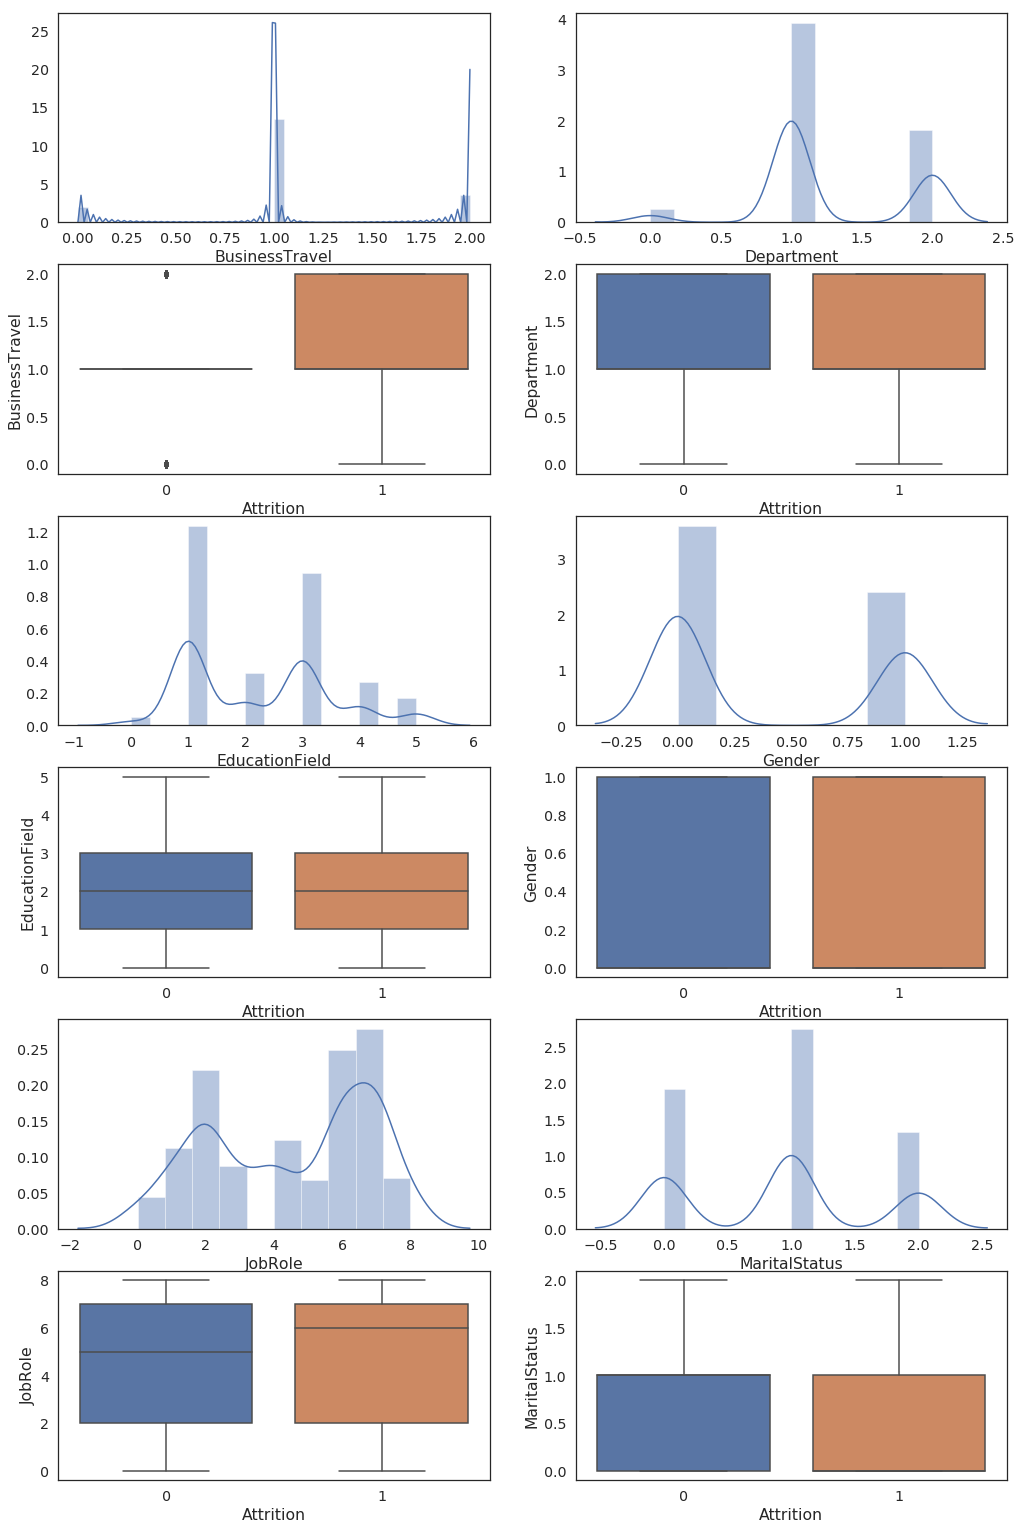

In [22]:
# plot boxplot and bar chart for all Categorical values as part of bivariant analysis - Categorical converted t numerical for consistancy 
sns.set(style='white', font_scale=1.3, color_codes=True, rc={'figure.figsize':(15,8)})
row=6
col=2
fig,ax = plt.subplots(row,col, figsize=(17,27))  # 'ax' has references to all the four axes
x=0
y=0
# Check if Numerical column then plot bar and box plot
for i in range(df_hrAttrition.shape[1]):
    if disccateg_col.count(df_hrAttrition.columns.values[i]) > 0 :        
        if(i!=1):
            sns.distplot(df_hrAttrition[df_hrAttrition.columns.values[i]], ax = ax[x,y])  # Plot on 1st axes 
           # print("loop"+str(df_hrAttrition.columns.values[i]))
            print("\n")
            sns.boxplot(df_hrAttrition['Attrition'],df_hrAttrition[df_hrAttrition.columns.values[i]], ax = ax[x+1,y])  # Plot on 1st axes 
            
        y=y+1
        if(x<row-2 and y==col):
            x=x+2
            y=0
        if(x==row-2 and y==col):
            break
    else:
        continue
plt.show()

In [26]:
#. Per initial analysis Education, relationshipSatisfaction,StockOptionLevel does not affect Attrition. Hence drop before performing pandas profiling.
df_hrAttrition = df_hrAttrition.drop(['Education','RelationshipSatisfaction','StockOptionLevel','RelationshipSatisfaction'],axis=1)
df_hrAttrition.columns

KeyError: "['Education' 'RelationshipSatisfaction' 'StockOptionLevel'\n 'RelationshipSatisfaction'] not found in axis"

In [28]:
#Now  Data Cleanup is done-- Perform Pandas Profiling on Data 
profile = ProfileReport(df_hrAttrition, title="Pandas Profiling Report")
# Perform Pandas profiling
profile = df_hrAttrition.profile_report(title='Pandas Profiling - Employee data for Attrition')
profile.to_file(output_file="profiling_preprocessing_EmpAttrition.html")

In [24]:
df_hrAttritionTrue = df_hrAttrition[df_hrAttrition["Attrition"]==1]

In [30]:
# Fr machine learning algrithm
newdf_hrAttrition = df_hrAttrition.drop(['Age','Department','EducationField','JobInvolvement','MaritalStatus','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','TrainingTimesLastYear','WorkLifeBalance'],axis=1) 

In [34]:
# Import machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score  
from sklearn.tree import DecisionTreeClassifier
print("sklearn packages initiated")

sklearn packages initiated


In [37]:
#Model evaluatin
df_y=newdf_hrAttrition.loc[:,"Attrition"] #Attrition is target variable

In [39]:
df_x = newdf_hrAttrition.drop(["Attrition"],axis=1) # Explainatory variables

In [40]:
df_x

,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,OverTime,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,1,2,1,94,2,7,4,5993,1,8,6,4,0,5
1,2,8,3,0,61,2,6,2,5130,0,10,10,7,1,7
2,1,2,4,0,92,1,2,3,2090,1,7,0,0,0,0
3,2,3,4,1,56,1,6,3,2909,1,8,8,7,3,0
4,1,2,1,0,40,1,2,2,3468,0,6,2,2,2,2
5,2,2,4,0,79,1,2,4,3068,0,8,7,7,3,6
6,1,3,3,1,81,1,2,1,2670,1,12,1,0,0,0
7,1,24,4,0,67,1,2,3,2693,0,1,1,0,0,0
8,2,23,4,0,44,3,4,3,9526,0,10,9,7,1,8
9,1,27,3,0,94,2,1,3,5237,0,17,7,7,7,7


In [41]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=.2,random_state=4)

In [42]:
print(x_train.shape,x_test.shape)

(1176, 15) (294, 15)


In [53]:
#Model evaluation
model=DecisionTreeClassifier() # Create object of Decision tree classifier
fittedModel=model.fit(x_train, y_train) #Perform .fit for training data
predictions=fittedModel.predict(x_test) #Perform .predict for test data

In [54]:
accuracy=accuracy_score(y_test,predictions)
print('Accuracy:',accuracy)

Accuracy: 0.8027210884353742


In [56]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, predictions))

In [ ]:
confusion_matrix.index = ['Actual Active','Actual Resigned']
confusion_matrix.columns = ['Predicted Active','Predicted Resigned']
print(confusion_matrix)

In [25]:
(df_hrAttritionTrue["BusinessTravel"].value_counts()/df_hrAttrition["BusinessTravel"].value_counts())*100
#(df_hrAttritionTrue["BusinessTravel"].value_counts()/df_hrAttrition["BusinessTravel"].value_counts()).plot(kind="pie",figsize=(12,4))
(df_hrAttritionTrue["BusinessTravel"].value_counts()/df_hrAttrition["BusinessTravel"].value_counts())*100

DistanceFromHome

NameError: name 'DistanceFromHome' is not defined

In [ ]:
df_hrAttritionTrue.info()

In [34]:
#Now  Data Cleanup is done -- Perform Pandas Profiling on Data 
profile = ProfileReport(df_hrAttritionTrue, title="Pandas Profiling Report - Resigned ")
# Perform Pandas profiling
profile = df_hrAttrition.profile_report(title='Pandas Profiling - Resigned Employee data for Attrition')
profile.to_file(output_file="profiling_preprocessing_EmpAttrition_Resigned.html")

<AxesSubplot:ylabel='BusinessTravel'>

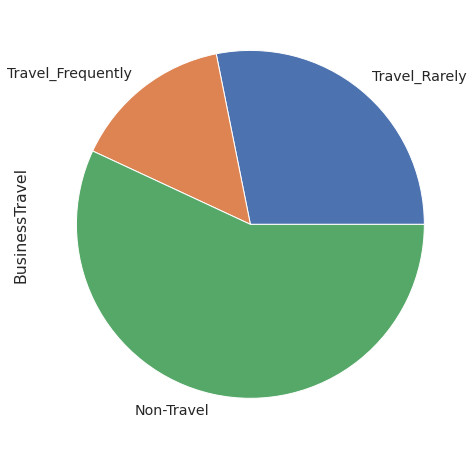

In [47]:
df_hrAttrition.BusinessTravel.value_counts()
#df_hrAttrition[df_hrAttrition["Attrition"] == 0].BusinessTravel.value_counts().plot(kind="bar",color="Blue")
#df_hrAttrition[df_hrAttrition["Attrition"] == 1].BusinessTravel.value_counts().plot(kind="bar",color="Red")
(df_hrAttrition[df_hrAttrition["Attrition"] == 0].BusinessTravel.value_counts()/df_hrAttrition[df_hrAttrition["Attrition"] == 1].BusinessTravel.value_counts()).plot(kind="pie")
#sns.boxplot(df_hrAttrition['Attrition'],df_hrAttrition[df_hrAttrition.BusinessTravel.value_counts()])

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

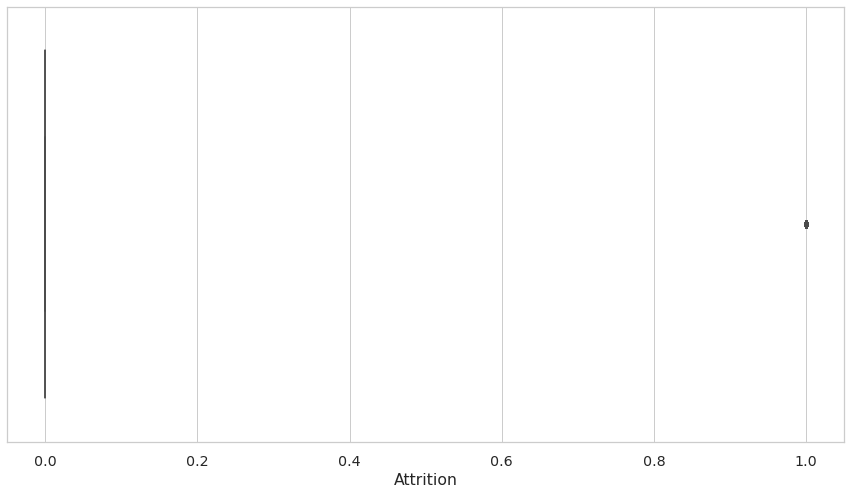

In [70]:
#df_hrAttrition=df_hrAttrition.replace({'BusinessTravel':{0:'Non-Travel',1:'Travel_Rarely',2:'Travel_Frequently'}})
#sns.boxplot(df_hrAttrition['Attrition'],df_hrAttrition["BusinessTravel"])
sns.boxplot(x="Attrition", hue="BusinessTravel",data=df_hrAttrition)
df_hrAttrition['BusinessTravel'].unique()

<AxesSubplot:xlabel='WorkLifeBalance'>

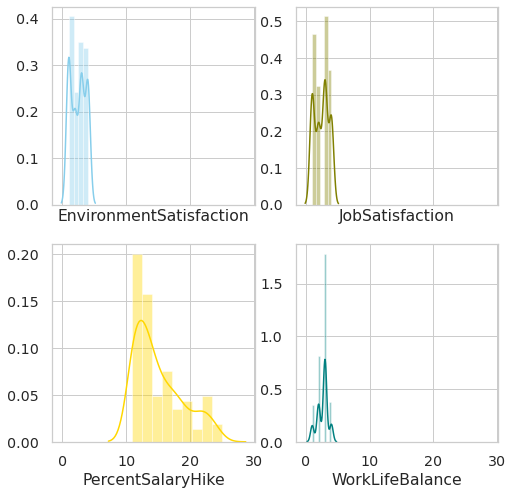

In [39]:
###### Uni Variant Analysis For Categorical column get bar chart ########

sns.boxplot(df_hrAttrition['Attrition'],df_hrAttrition[df_hrAttrition.BusinessTravel.value_counts()]
            
df_hrAttritionTrue = df_hrAttrition[df_hrAttrition["Attrition"] == 1]
#sns.distplot(["EnvironmentSatisfaction","JobSatisfaction"])
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.distplot( df_hrAttritionTrue["EnvironmentSatisfaction"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df_hrAttritionTrue["JobSatisfaction"] , color="olive", ax=axes[0, 1])
sns.distplot( df_hrAttritionTrue["PercentSalaryHike"] , color="gold", ax=axes[1, 0])
sns.distplot( df_hrAttritionTrue["WorkLifeBalance"] , color="teal", ax=axes[1, 1])

In [47]:
# df_hrAttrition[df_hrAttrition["Attrition"]==0 and df_hrAttrition["DistanceFromHome"]>10]
df_hrAttrition[df_hrAttrition["Attrition"]==1]["DistanceFromHome"].unique()

array([ 1,  2, 24,  9,  6, 16,  5,  3, 25, 12,  7, 14, 23, 22, 20,  8, 29,
       27,  4, 26, 18, 10, 19, 15, 17, 11, 13, 21, 28])

In [ ]:
sns.distplot(df_hrAttrition["DistanceFromHome"])  # Plot on 1st axes
sns.countplot(x="Age", data=df_hrAttrition,hue="Attrition")
sns.distplot(df_hrAttrition["Age"], rug=True, hist=True,hue="Attrition")
sns.barplot(x="BusinessTravel", data=df_hrAttrition,hue="Attrition")

In [ ]:
##### These were tried to come up with diagrams for analysis.. does not have direct impact and no need to execute.

df_hrAttrition.plot(kind="bar",x="Age", figsize=(15,4))
sns.regplot(df_hrAttrition["EmployeeNumber"], rug=True, hist=True)

df_hrAttritiontrue["Department"].value_counts()
df_hrAttritiontrue["Department"].value_counts().plot(kind="pie", figsize=(15,4),label=True)
df_hrAttritiontrue["Gender"].value_counts()
df_hrAttritiontrue["Gender"].value_counts().plot(kind="bar",label=True)
df_hrAttritiontrue["Gender"].value_counts()
df_hrAttritiontrue["Gender"].value_counts().plot(kind="pie", figsize=(15,4),label=True)